# Data Preprocessing

In [44]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image=x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

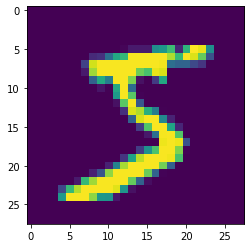

In [7]:
plt.imshow(single_image)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_example=to_categorical(y_train)

In [12]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
y_cat_test=to_categorical(y_test,num_classes=10)

In [14]:
y_cat_train=to_categorical(y_train,10)

In [15]:
single_image.max()

255

In [16]:
single_image.min()

0

## Scaling

In [17]:
x_train=x_train/255

In [18]:
x_test=x_test/255

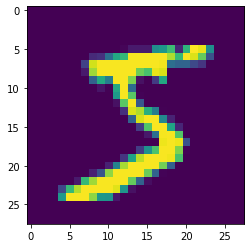

In [19]:
plt.imshow(x_train[0])

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
#batch_size,width,height,color_channels
x_train=x_train.reshape(60000,28,28,1)

In [22]:
x_test=x_test.reshape(10000,28,28,1)

In [25]:
28*28

784

# Training

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [26]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),
                 input_shape=(28,28,1),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

#output layer SOFTMAX-->MULTI CLASS
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])


In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [29]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),
         callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1353 - accuracy: 0.9595 - val_loss: 0.0565 - val_accuracy: 0.9807
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0462 - accuracy: 0.9858 - val_loss: 0.0393 - val_accuracy: 0.9874
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0413 - val_accuracy: 0.9873


In [30]:
metrics=pd.DataFrame(model.history.history)

In [31]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.135317,0.959483,0.056477,0.9807
1,0.046191,0.985750,0.039305,0.9874
2,0.031300,0.990067,0.041349,0.9873


<AxesSubplot:>

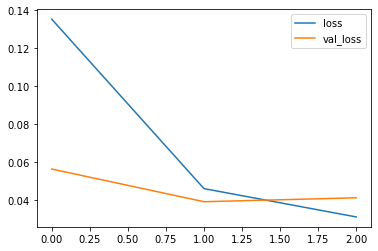

In [32]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

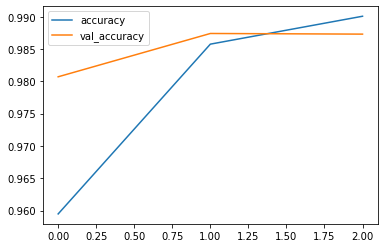

In [34]:
metrics[['accuracy','val_accuracy']].plot()

In [35]:
model.metrics_names

['loss', 'accuracy']

In [36]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04134916514158249, 0.9872999787330627]

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
predictions=np.argmax(model.predict(x_test), axis=-1)

In [40]:
y_cat_test.shape

(10000, 10)

In [41]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [43]:
confusion_matrix(y_test,predictions)

array([[ 977,    0,    0,    1,    0,    0,    1,    0,    1,    0],
       [   1, 1126,    6,    0,    0,    0,    2,    0,    0,    0],
       [   2,    0, 1025,    2,    1,    0,    0,    1,    1,    0],
       [   0,    0,    3, 1005,    0,    0,    0,    0,    1,    1],
       [   1,    0,    2,    0,  970,    0,    1,    0,    1,    7],
       [   2,    0,    0,    8,    0,  875,    2,    0,    3,    2],
       [   9,    1,    0,    0,    3,    2,  942,    0,    1,    0],
       [   1,    2,   12,    3,    0,    0,    0, 1007,    1,    2],
       [   3,    0,    3,    4,    0,    2,    1,    1,  955,    5],
       [   3,    2,    0,    3,    4,    2,    0,    2,    2,  991]],
      dtype=int64)

<AxesSubplot:>

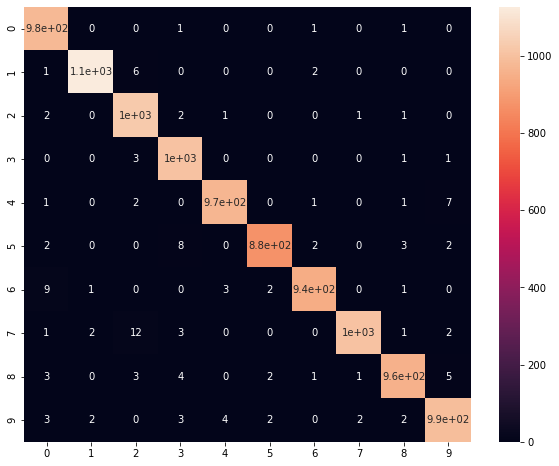

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

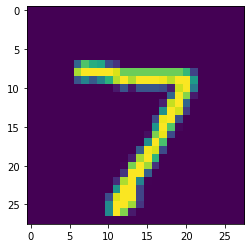

In [46]:
plt.imshow(x_test[0].reshape(28,28))

In [47]:
#num_images,width,height,color_ channels
model.predict_classes(x_test[0].reshape(1,28,28,1))

array([7], dtype=int64)